<a href="https://colab.research.google.com/github/Ronan-Castro/Modelo-de-Validacao-sobre-Risco-de-Fogo-na-Regiao-de-Altamira/blob/main/Vers%C3%A3o_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
#FRP (Fire Radiative Power)

In [ ]:
def metrics_report(y, y_pred, dataset_name='valid'):
  mean_y = np.mean(y)
  mean_pred = np.mean(y_pred)

  rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  mape = mean_absolute_percentage_error(y_pred, y)
  report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

  report[dataset_name] = report[dataset_name].round(2)
  return report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projeto Tera/Dados/DadosTotais_SemiTratados2.csv')

In [ ]:
df[df.isna().any(axis=1)]

,Data,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,...,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)


In [ ]:
df.describe()

,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,Hora (UTC),Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)
count,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.0,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000,8867.000000
mean,20.039698,0.547790,0.755050,-6.866366,-54.312897,95.159986,1000.0,28.481127,75.908278,999.865729,1.123217,136.610278,5.785237,7.923977,34.656535,21.561784,0.990628
std,23.371214,2.947784,0.310578,1.317747,0.817088,221.054888,0.0,1.089833,5.866688,1.309172,0.731353,92.904011,1.913931,1.935314,1.679460,0.953045,4.685474
min,0.000000,0.000000,0.000000,-9.591500,-55.477000,0.000000,1000.0,24.000000,59.000000,995.500000,0.000000,0.000000,0.000000,0.000000,29.500000,18.800000,0.000000
25%,5.000000,0.000000,0.600000,-7.994975,-54.998000,19.700000,1000.0,28.200000,72.500000,999.350000,0.750000,63.333333,5.000000,6.300000,32.890000,20.900000,0.000000
50%,9.000000,0.000000,0.900000,-6.572850,-54.700450,39.500000,1000.0,28.200000,78.500000,999.560000,0.900000,130.000000,6.670000,7.700000,35.000000,22.000000,0.000000
75%,25.000000,0.000000,1.000000,-6.184000,-53.568630,85.400000,1000.0,28.950000,78.940000,1000.350000,1.433333,180.000000,6.670000,10.000000,36.200000,22.330000,0.300000
max,120.000000,114.400000,1.000000,-3.125210,-51.921000,5098.900000,1000.0,32.100000,95.000000,1004.500000,3.600000,360.000000,10.000000,11.000000,37.500000,23.500000,96.400000


In [ ]:
lista = list(df.columns)

In [ ]:
lista.remove('Hora (UTC)')
lista.remove('Data')
lista.remove('estado')
lista.remove('municipio')
lista.remove('bioma')

In [ ]:
df[df.isna().any(axis=1)]

,Data,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,...,Temp. [Hora] (C),Umi. (%),Pressao (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Nebulosidade (Decimos),Insolacao (h),Temp. Max. [Diaria] (h),Temp. Min. [Diaria] (h),Chuva [Diaria] (mm)


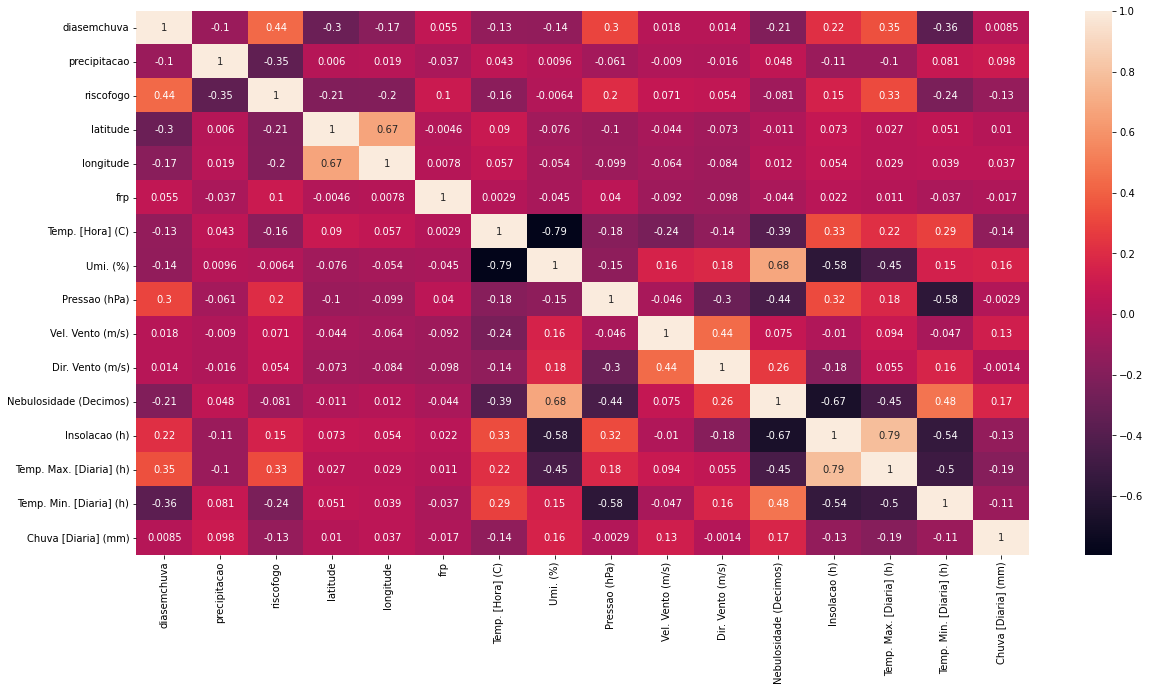

In [ ]:
plt.figure(figsize=(20, 10))
correlacao = df[lista].corr()
sns.heatmap(correlacao,annot=True)

In [ ]:
le = preprocessing.LabelEncoder()
df['city'] = le.fit_transform(df['municipio']) 
df['state'] = le.fit_transform(df['estado']) 

mediana1 = df['diasemchuva'].median()
df2 = df
df2['diasemchuva'] = np.where(df['diasemchuva'] <0, mediana1, df['diasemchuva'])



In [ ]:
X = df2[lista].drop('riscofogo', axis = 1)
y = df2['riscofogo']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
clf = RandomForestRegressor(random_state=42)
clf.fit(X, y)

RandomForestRegressor(random_state=42)

In [ ]:
y_baseline_pred = clf.predict(X_train)
baseline_report = metrics_report(y_train, y_baseline_pred, 'Treino')
baseline_report

,metric,Treino
0,RMSE,0.04
1,MAE,0.02
2,R^2,0.98
3,MAPE,0.08
4,Avg. target,0.75
5,Avg. Prediction,0.75


In [ ]:
y_baseline_test = clf.predict(X_test)

baseline_report = baseline_report.merge(metrics_report(y_test, y_baseline_test, 'Teste'), how='inner', on='metric')
baseline_report

,metric,Treino,Teste
0,RMSE,0.04,0.04
1,MAE,0.02,0.02
2,R^2,0.98,0.98
3,MAPE,0.08,0.08
4,Avg. target,0.75,0.76
5,Avg. Prediction,0.75,0.76


In [ ]:
y_baseline_valid = clf.predict(X_valid)

baseline_report = baseline_report.merge(metrics_report(y_valid, y_baseline_valid, 'Validation'), how='inner', on='metric')
baseline_report

,metric,Treino,Teste,Validation
0,RMSE,0.04,0.04,0.04
1,MAE,0.02,0.02,0.02
2,R^2,0.98,0.98,0.98
3,MAPE,0.08,0.08,0.08
4,Avg. target,0.75,0.76,0.76
5,Avg. Prediction,0.75,0.76,0.76


In [ ]:
lista.remove('riscofogo')

Text(0.5, 0, 'Random Forest Feature Importance')

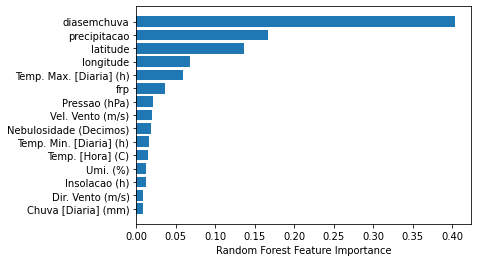

In [ ]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(df2[lista].columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
perm_importance = permutation_importance(clf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

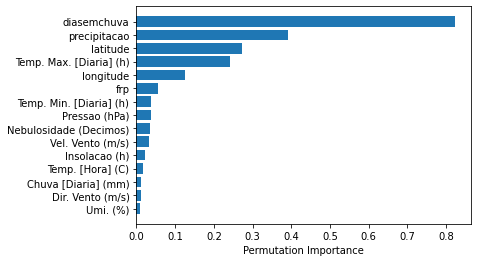

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df2[lista].columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 8.3 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

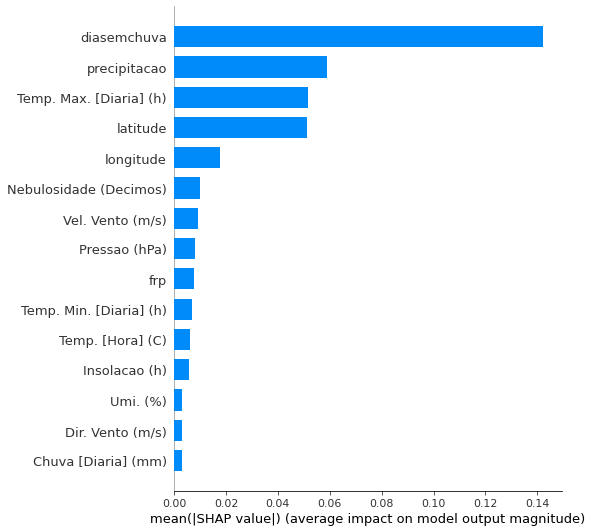

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

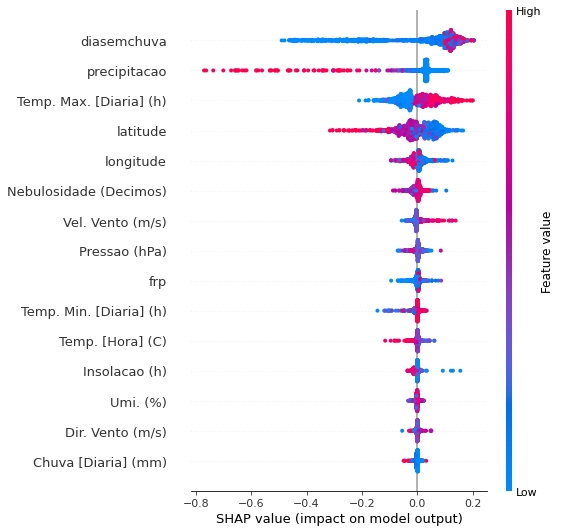

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
import pickle

In [ ]:
import joblib

In [ ]:
s = pickle.dumps(clf)

In [ ]:
joblib.dump(clf, 'model2.joblib')

['model2.joblib']

In [ ]:
!cp model2.joblib "/content/drive/MyDrive/Projeto Tera/Notebook/Testes Ronan/"